In [2]:
import FinanceDataReader as fdr


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [3]:
bitcoin_data = pd.read_csv('D:/김홍민/김재윤 교수님 연구실/졸업 준비/clean_bitcoin_data_with_usd_krw_updated.csv')

bitcoin_data.isna().sum()

print(bitcoin_data)

      Unnamed: 0        Date    Close     Open     High      Low  \
0             49  2017-02-19   1048.9   1052.3   1056.5   1037.7   
1             50  2017-02-20   1077.6   1048.9   1081.8   1041.0   
2             51  2017-02-21   1119.0   1077.6   1123.0   1073.5   
3             52  2017-02-22   1120.5   1119.0   1132.3   1094.8   
4             53  2017-02-23   1171.9   1120.5   1181.6   1113.5   
...          ...         ...      ...      ...      ...      ...   
2776        2825  2024-09-26  65175.7  63157.2  65770.9  62693.3   
2777        2826  2024-09-27  65776.3  65168.8  66440.7  64839.2   
2778        2827  2024-09-28  65866.5  65775.6  66232.5  65438.1   
2779        2828  2024-09-29  65607.1  65862.8  66065.7  65436.8   
2780        2829  2024-09-30  63339.2  65607.0  65607.0  62901.1   

      Trade_Volume  change_percent rise_fall        SMA           EMA  \
0            17950           -0.32      rise    951.056    980.292295   
1            31010            2.73   

In [4]:
# Convert 'Date' to datetime and set it as index
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.set_index('Date', inplace=True)

In [5]:
# 문자형인 종속 변수를 수치형으로 변환
bitcoin_data['rise_fall'] = bitcoin_data['rise_fall'].map({'rise': 1, 'fall': 0})

In [6]:
bitcoin_data.drop(['Unnamed: 0', 'change_percent'], axis=1, inplace=True) # delete adjusted close
bitcoin_data.rename(columns= {'USD_KRW_Exchange_Rate' : 'EXR'}, inplace= True)


In [7]:
bitcoin_data.describe()

,Close,Open,High,Low,Trade_Volume,rise_fall,SMA,EMA,EXR
count,2781.000000,2781.000000,2781.000000,2781.000000,2.781000e+03,2781.000000,2781.000000,2781.000000,2781.000000
mean,23556.923193,23534.648328,24091.468644,22937.866235,2.218715e+07,0.519238,23027.624789,21449.965747,1204.442316
std,19665.137043,19655.310374,20090.980509,19183.109938,2.071570e+08,0.499720,19227.981613,17134.435497,94.036761
min,939.700000,939.700000,996.000000,841.500000,2.600000e+02,0.000000,951.056000,980.292295,1054.940000
25%,7426.700000,7423.800000,7626.000000,7284.300000,7.248000e+04,0.000000,7492.182000,7883.437752,1127.810000
50%,16829.800000,16820.500000,17096.200000,16542.400000,1.424500e+05,1.000000,16431.832000,12728.271970,1182.460000
75%,37745.100000,37718.600000,38862.600000,36682.300000,4.551300e+05,1.000000,38040.622000,35844.039990,1295.730000
max,73066.300000,73066.700000,73740.900000,71338.400000,4.470000e+09,1.000000,67538.098000,59868.533990,1444.630000


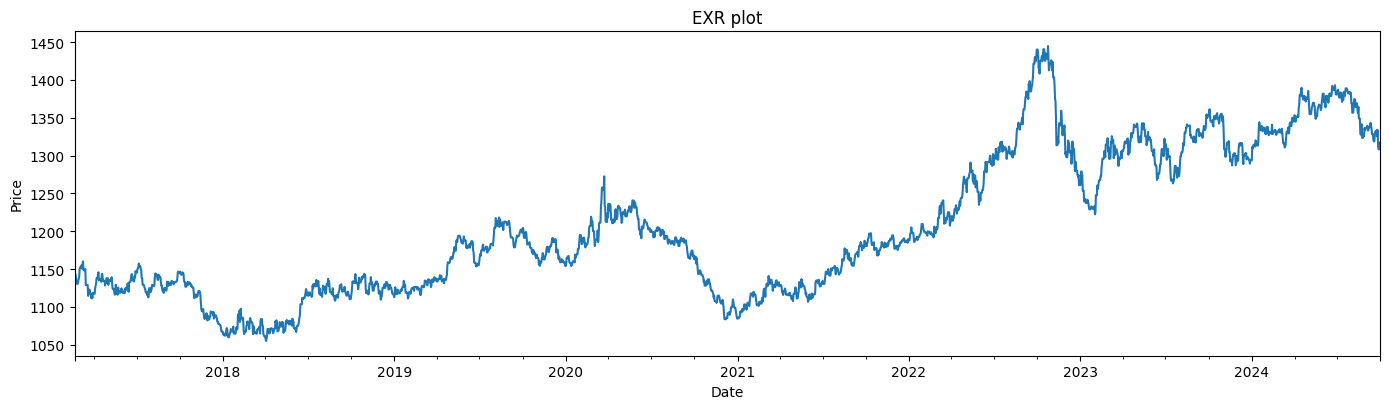

In [8]:
# Plotting
plt.figure(figsize=(14, 4.2))
bitcoin_data['EXR'].plot()
plt.title("EXR plot")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

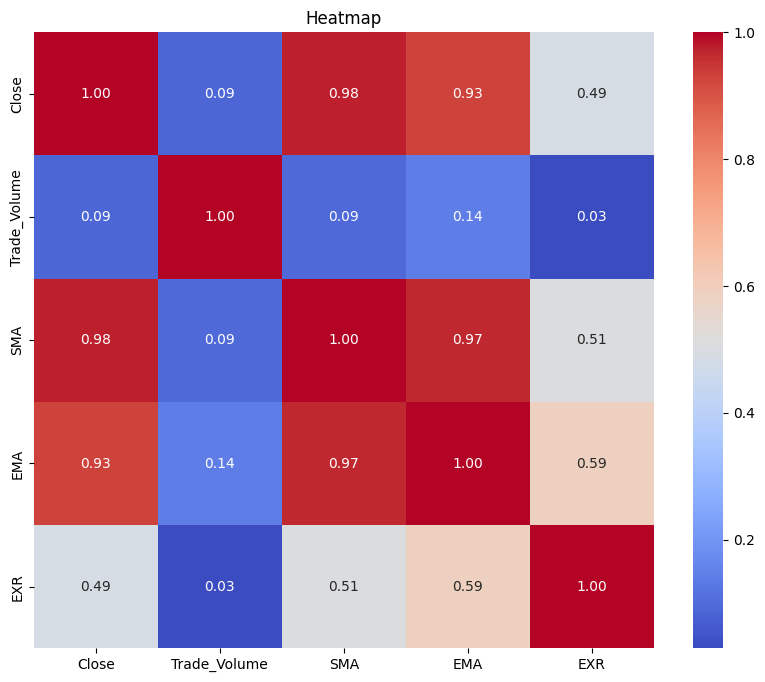

In [ ]:
# Select columns of interest
columns_of_interest = ['Close', 'Trade_Volume', 'SMA', 'EMA', 'EXR']
correlation_data = bitcoin_data[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()